# <font color='pink' size='6'>All Mission Space from 1957</font>

### Saaalve galera mbora aprender um pouco mais com os dados que temos a nossa disposição no Kaggle, eu como sendo um fascinado pela astrofísica decidi pegar os dados de todas as missões para o espaço desde 1957.
### Mbora então ver e aprender um pouco mais sobre como fazer análise exploratória dos dados com Python huhuh :) e já coletar insights
### Link do dataset: https://www.kaggle.com/agirlcoding/all-space-missions-from-1957 e simboraaa.

#### Ao contrário de que muita gente pensa no mundo real quando um Analista de Dados desenvolve um projeto as coisas não seguem extamente igual como nos é ensinado...
#### Nós sabemos que existe uma sequência que se segue ao desenvolvermos um projeto de Data Analysis: 1. Perguntas; 2. Coleta/Organização do dados; 3. Análise dos Dados; 4. Apresentação.
#### Só que como sabemos na prática nem sempre é assim. No dia a dia as coisas podem acontecer em oredem diferentes, sabemos a sequência e aonde queremos chegar, no final isso é o que importa.
#### Então aqui irei simular o mundo real huhuh.

# <font color='pink'>Coleta dos Dados</font>

#### Os dados que iremos utilizar estão no link:https://www.kaggle.com/agirlcoding/all-space-missions-from-1957 
#### O que você vai fazer é baixar e descompactar, ele já vem no formato csv.

# <font color='pink'>Carregando os Dados</font>

#### Para carregarmos um arquivo no formato csv iremos importar a biblioteca pandas que também irá nos ajudar no decorrer de nossas análises

In [1]:
# Biblioteca para análise de dados e estrutura de dados com alta performance e também fácil de usar.
import pandas as pd 

#### Feito isso iremos carregar o arquivo, lembrando que o arquivo tem que estar no mesmo diretório onde está o jupyter notebook
#### Se ele estiver em outro diretório basta colocar o caminho completo.

In [2]:
# Carregando o arquivo, aqui o processo é simples basta executar essa linha
df = pd.read_csv('files/datasets_828921_1417131_Space_Corrected.csv')

In [3]:
# Para vermos se o arquivo foi carregado com sucesso executamos
df.head() # O método head() por padrão imprime as 5 primeiras linhas do dataset

# Experimenta também...
#df.head(10)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [4]:
# Como vimos, temos o nosso arquivo lindo e gordinho, agora vamos ver o formato dele
# Temos (linhas:4324, colunas: 9)
df.shape

(4324, 9)

# <font color='pink'>Entendendo como estão estruturado os Dados e organizá-los</font>

In [5]:
# Como podemos ver, se o nosso df tem colunas repetidas né, podemos selecionar somente as colunas que iremos usar
# Vamos visualizar todas as colunas do df
for i in df.columns:
    print(i)

# Experimenta também...
#df.columns

Unnamed: 0
Unnamed: 0.1
Company Name
Location
Datum
Detail
Status Rocket
 Rocket
Status Mission


In [6]:
# Dá pra ver que as colunas Unnamed: 0', 'Unnamed: 0.1 e Rocket não iremos precisar
# Selecionando as colunas que iremos usar
col_select = ['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket', 'Status Mission']
df = df.filter(items = col_select)

# Imprimindo o df com os dados filtrados
df.head()

# Experimenta também...
#df.sample(6)

,Company Name,Location,Datum,Detail,Status Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,Success


In [7]:
# Visualisando valores nulos no df
df.isnull().sum()

Company Name      0
Location          0
Datum             0
Detail            0
Status Rocket     0
Status Mission    0
dtype: int64

# <font color='pink'>Análise Exploratória</font>

#### Nossos dados estão em dados nulos e estão organizados como gostaríamos, se tivesse dados nulos tem formas de tratar esses dados sem perder a essencia dos daods

#### Agora sim podemos fazer algumas perguntas começando com:
## * Desde 1957 quantas Missões foram realizadas, apresentando por status da missão?

In [8]:
# Vamos explorar o nosso df, já vemos que temos uma coluna 'Status Mission' que mostra os status das missões
# Mas não sabemos quais são os status
# Imprimindo todos os status únicos de missões do nosso df
for i in df['Status Mission'].unique():
    print(i)

# Experimenta também...
#df['Status Mission'].unique()
#df['Status Mission'].nunique()

Success
Failure
Prelaunch Failure
Partial Failure


In [9]:
# Já vimos que temos três tipos de status: 'Success', 'Failure', 'Prelaunch Failure' e 'Partial Failure'
# Visualizando a quantidade de missões por status
df['Status Mission'].value_counts()

# Experimenta também...
#print(pd.DataFrame(df['Status Mission'].value_counts()))

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Status Mission, dtype: int64

#### Podemos ver que grande parte das missões realizadas foram bem sucedidas, graças à Deus! Hehehehe
#### Mas para deixarmos isso mais interssante que tal já prepararmos esse insight bonitinho para o nosso report?

In [10]:
# Vamos chamar a biblioteca seaborn para visualização de dados, possibilitando a criação de gráficos sofisticados
import seaborn as sns 

# E vamos usar seaborn para que toda vez que imprimirmos os gráfico possamos ter as linhas de grades para melhor 
# entendimento das informações apresentadas.
sns.set(style = "whitegrid") 

# E além disso também vamos chamar o conjunto de funções do matplotlib, o pyplot permite criar figuras 
# e gráficos com rótulos 
import matplotlib.pyplot as plt 

# E por último, se quisermos visualizar aqui no jupyter notebook os gráficos que iremos criar 
# precisaremos desse cara
%matplotlib inline 

#### O processo é simples mbora lá...

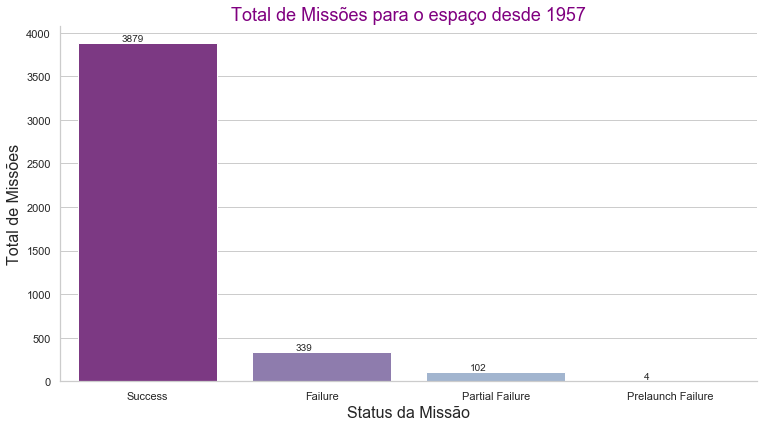

In [11]:
# Nesse caso iremos usar um gráfico de categoria, que é o catplot é bem bacana e iremos colocar pimenta por cima
# pra ficar ainda mais gostoso.

# Definindo os valores para os eixos x e y
x = df['Status Mission'].value_counts().index
y = df['Status Mission'].value_counts()

# Criando o gráfico
g = sns.catplot(x = x, y = y, data = df, kind = 'bar', aspect = 1.9, height = 5.5, palette = 'BuPu_r')
g.ax.set_title('Total de Missões para o espaço desde 1957', fontdict = {'size':18}, color = 'purple')
g.ax.xaxis.set_label_text('Status da Missão', fontdict = {'size':16})
g.ax.yaxis.set_label_text('Total de Missões', fontdict = {'size': 16})

# Imprimindo a contagem por cima das barras do gráfico
for i in g.ax.patches:
    g.ax.annotate((int(i.get_height())), (i.get_x()+0.25, i.get_height()+20))

#### Vamos a próxima pergunta?
## Quais os 10 países/locaias que mais tiveram sucesso nos lançamentos?

In [12]:
# Mbora olhar de novo o nosso dataset?
df.sample(3)
# Temos a coluna 'Location' mostra o local exato do lançamento e o país boa!

,Company Name,Location,Datum,Detail,Status Rocket,Status Mission
104,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Aug 30, 2019 23:41 UTC",Kuaizhou 1A | KX-09 & Others,StatusActive,Success
2585,Martin Marietta,"SLC-40, Cape Canaveral AFS, Florida, USA","Sat Jun 10, 1978 19:08 UTC",Titan III(23)C | OPS-9454 (vortex),StatusRetired,Success
3721,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Mon Oct 30, 1967 08:12 UTC",Soyuz | Cosmos 188,StatusRetired,Success


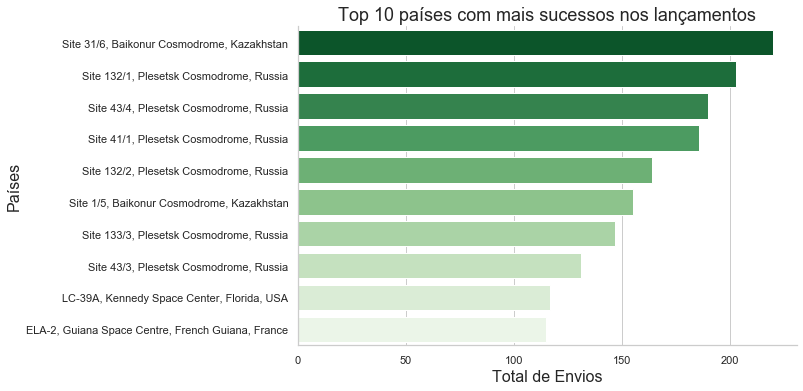

In [13]:
# vamos listar os 10 país que mais tiveram lançamentos bem sucedidos
success = df[df['Status Mission'] == 'Success']
success = success.Location.value_counts().head(10)

# Plotando o gráfico um pouco parecido com o anterior pra fixar heheh
g = sns.catplot(x = success, y = success.index, data = df, kind = 'bar', aspect = 2.2, palette = 'Greens_r')

# Título do gráfico e eixos (x, y)
g.ax.set_title('Top 10 países com mais sucessos nos lançamentos', fontdict = {'size':18})
g.ax.xaxis.set_label_text('Total de Envios', fontdict = {'size':16})
g.ax.yaxis.set_label_text('Países', fontdict = {'size':16})
plt.show()

# E para a minha surpresa (acredito de muita gente também), os EUA não é o país que teve mais sucesso
# nos lançamentos, ficando em nono lugar, e sim: Kazakhstan é o que lidera o top 10 dos país que mais 
# lançaram fogue à lua e o que teve mais sucesso, seguido da Rússia.
# Deu até uma ideia agora, que pode servir pra próxima pergunta, quais são os países/locais que foram menos 
# felizes em seus lançamentos?

#### Próxima pergunta...
## Quais são os países/locais que foram menos felizes em seus lançamentos?

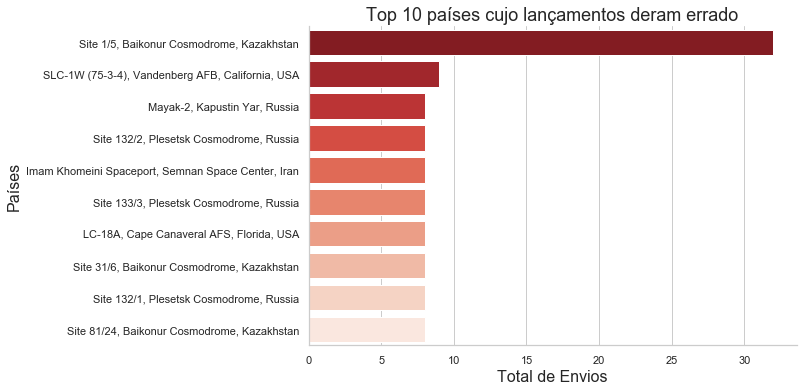

In [14]:
# vamos listar os 10 país que mais falharam nos lançamentos
failure = df[df['Status Mission'] == 'Failure']
failure = failure.Location.value_counts().head(10)

# Plotando o gráfico um pouco parecido com o anterior pra fixar heheh
g = sns.catplot(x = failure, y = failure.index, data = df, kind = 'bar', aspect = 2.2, palette = 'Reds_r', alpha = 1)

# Título do gráfico e eixos (x, y)
g.ax.set_title('Top 10 países cujo lançamentos deram errado', fontdict = {'size':18})
g.ax.xaxis.set_label_text('Total de Envios', fontdict = {'size':16})
g.ax.yaxis.set_label_text('Países', fontdict = {'size':16})
plt.show()

# Olha só... O Kazakhstan é o que mais lançou foguete e por consequência disso também é o que mais 
# falhou nos lançamentos, provando que a percistência valeu a pena. Um ponto aqui a destacar é que os EUA
# em termos de lançamentos bem sucedidos ficaram em nono lugar, porém também ficaram em 2 segundo lugar
# em lançamentos que deram errado, já dá pra termos uma noção que eles ficam na média, e isso é ruim!
# Poque a média é o melhor do pior e o pior do melhor...

#### Boa! Você aprendeu um pouco mais sobre análise exploratória e criação de gráficos, recomendo que faça isso de novo e de novo até ficar craque, tenta explorar com outros tipos de gráficos do Seaborn link: https://seaborn.pydata.org/ lá você terá outros gráficos tenta explorar mais, o segredo está na prática, então pratique.